In [1]:
from typing import Tuple

import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

$$ \textit{Euclidean distance}(a, b) = \sqrt{ (a_1 - b_1)^2 + ... + (a_N - b_N)^2 } = \sqrt{ \sum_{i=0}^{i=N} (a_{i} - b_{i})^2 } $$

In [2]:
def euclidean_distance(point1: np.array, point2: np.array) -> float:
    return np.sqrt(np.sum(np.power(point1 - point2, 2)))

## K-nearest neighbors

In [23]:
class KNN:
    def __init__(self, k: int) -> None:
        self._X_train = None
        self._y_train = None
        self.k = k  # number of neighbors to consider

    def fit(self, X_train: np.ndarray, y_train: np.ndarray) -> None:
        self._X_train = X_train
        self._y_train = y_train

    def predict(self, X_test: np.ndarray) -> np.ndarray:
        n = X_test.shape[0]
        y_pred = np.empty(n, dtype=self._y_train.dtype)

        for i in range(n):

            distances = np.zeros(len(self._X_train))
            for j in range(len(self._X_train)):
                distances[j] = euclidean_distance(self._X_train[j], X_test[i])
            
            k_indices = np.argsort(distances)[:self.k]
            k_nearest_labels = self._y_train[k_indices]

            y_pred[i] = np.bincount(k_nearest_labels).argmax()

        return y_pred

In [31]:
n_classes = 4
X_train, y_train = make_blobs(n_samples=500, n_features=4, centers=n_classes, random_state=450)

([], [])


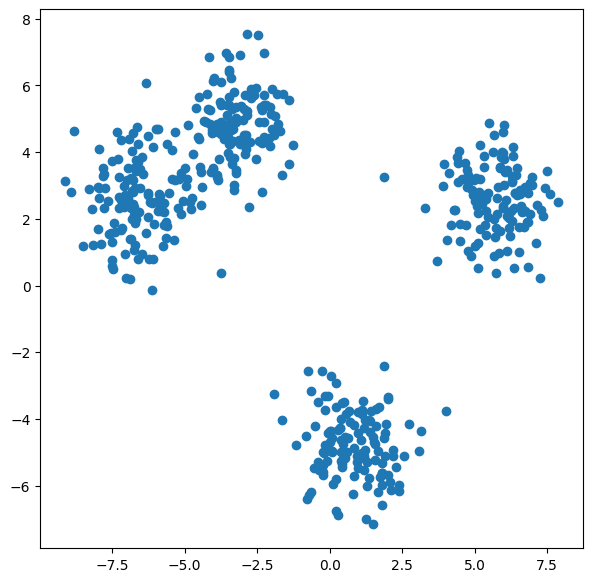

In [32]:
fig, ax = plt.subplots(figsize=(7, 7))
scatter = ax.scatter(X_train[:, 0], X_train[:, 1])
print(scatter.legend_elements())

In [33]:
model = KNN(3)
model.fit(X_train, y_train)

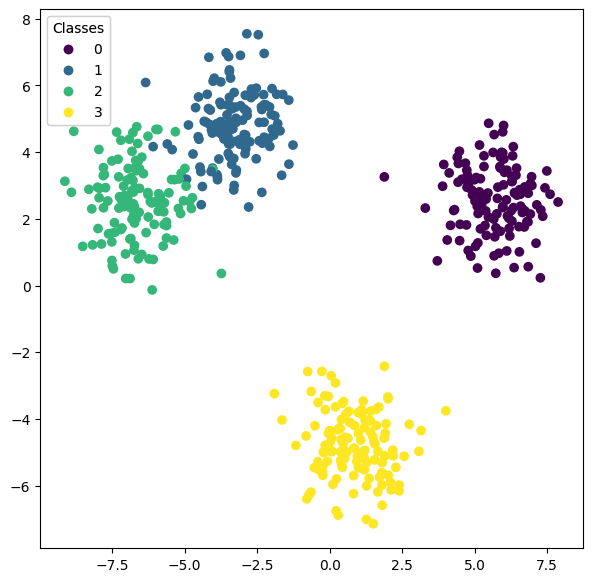

In [34]:
fig, ax = plt.subplots(figsize=(7, 7))
scatter = ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
legend1 = ax.legend(*scatter.legend_elements(), loc="upper left", title="Classes")
ax.add_artist(legend1);

In [8]:
X_test = np.array([
    [-8, -8],
    [-2, 10],
    [0,  0],
    [2.5, 2.5],
])

model.predict(X_test)

array([2, 0, 1, 1])

## K-means

In [9]:
class KMeans:
    def __init__(self, n_clusters: int = 2, max_iterations: int = 100, random_state: int = 42) -> None:
        self.n_clusters = n_clusters
        self.max_iterations = max_iterations
        self.random_state = np.random.RandomState(random_state)

    def predict(self, X) -> Tuple[np.ndarray, np.ndarray]:
        n_samples, n_features = X.shape

        centroid_idxs = self.random_state.choice(n_samples, size=self.n_clusters, replace=False)
        centroids = X[centroid_idxs]

        for _ in range(self.max_iterations):

            # assign each data point to the nearest centroid
            labels = np.zeros(n_samples, dtype=int)
            for i in range(n_samples):
                distances = [
                    euclidean_distance(X[i], centroid)
                    for centroid in centroids
                ]
                labels[i] = np.argmin(distances)  # index of the lowest distance

            # update centroids based on the assigned data points
            new_centroids = np.zeros_like(centroids)
            for c in range(self.n_clusters):
                points = X[labels == c]
                new_centroids[c] = np.mean(points, axis=0)  # mean over points

            if np.allclose(new_centroids, centroids):
                print("Centroids doesn't changed much, exiting...")
                break

            centroids = new_centroids

        return centroids, labels

Centroids doesn't changed much, exiting...
[[ 4.6565696   2.82162399]
 [-2.52414179  9.00394283]
 [ 4.8154933   1.13225251]
 [-6.25952996 -6.25644028]
 [-7.50731914 -7.34332349]]


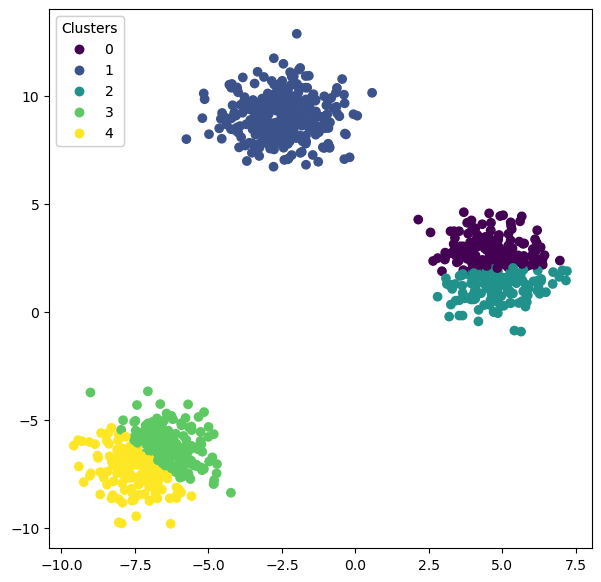

In [10]:
kmeans = KMeans(5, random_state=43)
centroids, clusters = kmeans.predict(X_train)
print(centroids)

fig, ax = plt.subplots(figsize=(7, 7))
scatter = ax.scatter(X_train[:, 0], X_train[:, 1], c=clusters)
legend1 = ax.legend(*scatter.legend_elements(), loc="upper left", title="Clusters")
ax.add_artist(legend1);

## Linear regression

$$ \hat{y} = w_0 + w_1 * x_1 $$

Matrix form:
$$ \hat{y} = X \cdot W $$


To find out tha values of $ W $:

$$ (X^T \cdot X) \cdot W = X^T \cdot y $$

$$ I \cdot W = (X^T \cdot X)^{-1} \cdot X^T \cdot y $$

$$ W = (X^T \cdot X)^{-1} \cdot X^T \cdot y $$


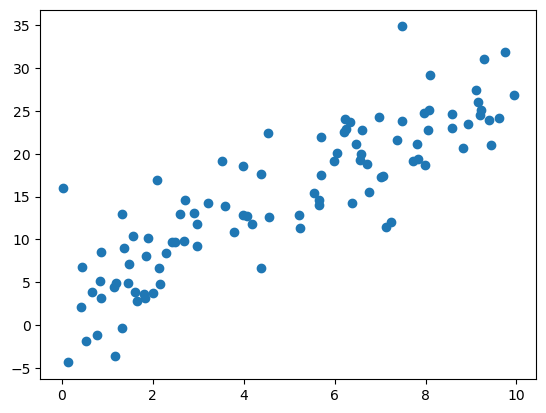

In [11]:
def generate_linear_data(n_samples, slope, intercept, noise_std=1.0):
    X = np.random.rand(n_samples, 1) * 10
    y = slope * X + intercept + np.random.randn(n_samples, 1) * noise_std
    return X, y


X, y = generate_linear_data(100, 2.5, 3, 5.0)
plt.scatter(X, y);

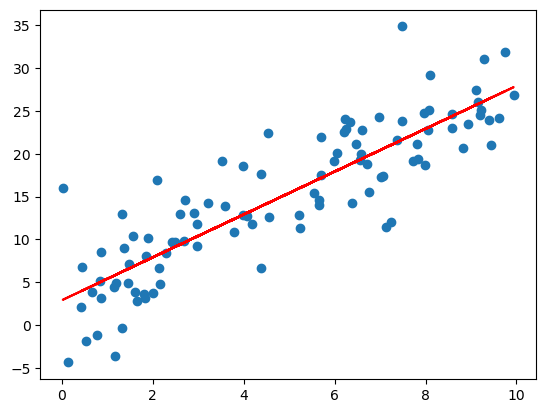

In [12]:
def linear_regression(X, y):
    biases = np.ones((X.shape[0], 1))
    X_bias = np.concatenate((biases, X), axis=1)

    solution = np.linalg.inv( X_bias.T @ X_bias ) @ X_bias.T @ y

    intercept = solution[0]
    slope = solution[1]
    return intercept, slope


lr_intercept, lr_slope = linear_regression(X, y)
plt.scatter(X, y)
plt.plot(X, lr_intercept + lr_slope * X, color="r");